# STUDY OF THE DATASET

## Creating a dataframe with Pandas

In [2]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.datasets import load_diabetes #importing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

#scipy
from scipy.stats import loguniform

In [3]:
#importing dataset
diab = load_diabetes()

#defininf feature and label
X = diab['data']
y = diab['target']

#printing shapes
print(X.shape, y.shape)

(442, 10) (442,)


In [4]:
#printing description
print(diab['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Creating the dtaframe with Pandas:

In [5]:
#creating dataframe from X
df = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

#adding 'progression' from y
df['progression'] = diab['target']

#showing head
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Checking for null values:

In [6]:
#showing dataframe info
df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
tc             0
ldl            0
hdl            0
tch            0
ltg            0
glu            0
progression    0
dtype: int64

In [7]:
#describing dataframe
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


An interesting thing that we can notice from the '.describe ()' function (but we can even read in the datsset documentation)is that, apart from 'progression', all columns have the same standard deviation: it means that they all have the same deviation from (their) mean.


Also, apart from a couple of exceptions, we see that all values (mean, min, max and percentiles) have the same order of magnitude for all columns (excluding 'progression').

## Correlation matrix

I create the correlation matrix to check if it can give me some indication about the correlation between some features and the label

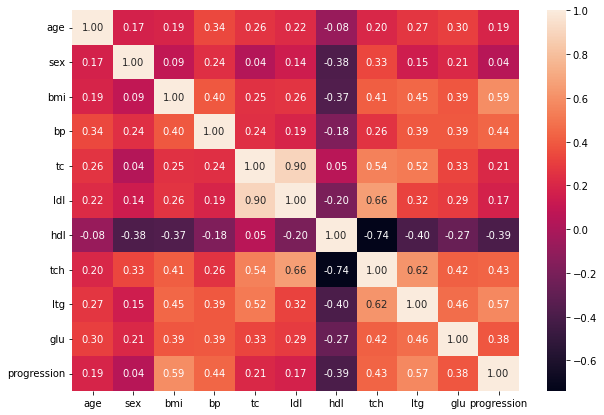

In [8]:
#figure size
plt.figure(figsize=(10, 7))

#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f')

There does not seem to be a big correlation between the progression of diabetes and the various features. There is moderate correlation with 'ltg', or 'lamotrigine' with a 0.57 and with bmi, or 'body mass' index', with a 0.59.

So I want to see if, graphically, it is possible to identify some kind of relationship between mbi and ltg with the progression of the disease.

<Figure size 720x504 with 0 Axes>

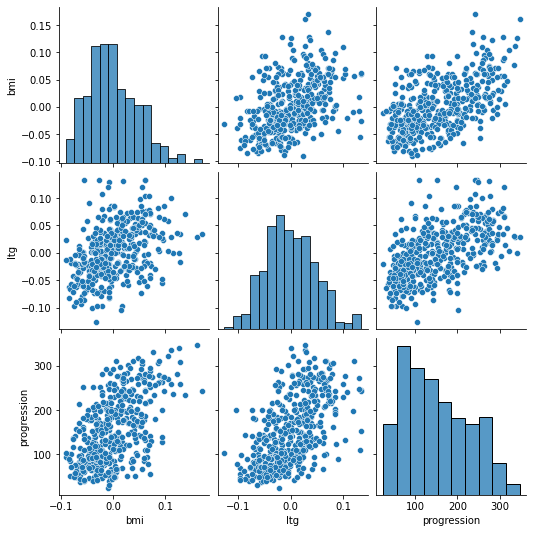

In [9]:
#figure size
plt.figure(figsize=(10, 7))

#plotting graphs
sns.pairplot(df[['bmi', 'ltg', 'progression']])

In the two graphs below, you can see the relationship between ltg and progression and between bmi and progression. There is a thickening of data, but it can also give the idea that the type of relationship is linear. Let's see it:

Text(0, 0.5, 'PROGRESSION')

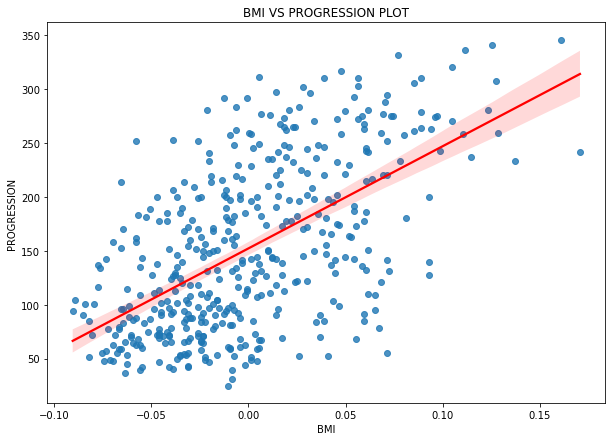

In [10]:
#figure size
plt.figure(figsize=(10, 7))

#regression between bmi and progression
sns.regplot(data=df, x='bmi', y='progression',line_kws={"color": "red"})

#labeling
plt.title('BMI VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')

Text(0, 0.5, 'PROGRESSION')

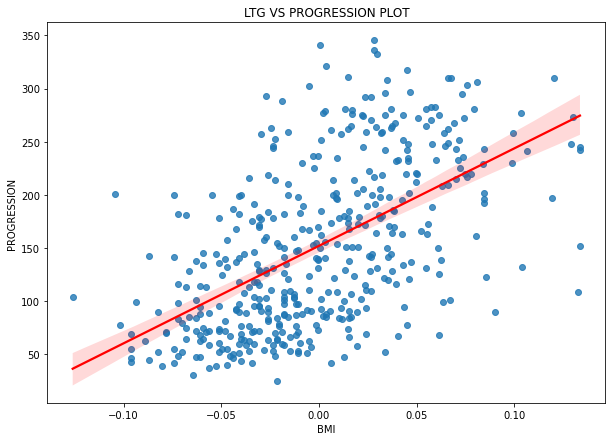

In [11]:
#figure size
plt.figure(figsize=(10, 7))

#regression between ltg and progression
sns.regplot(data=df, x='ltg', y='progression',line_kws={"color": "red"})

#labeling
plt.title('LTG VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')

In both cases, the dispersion of the data around the line is a bit too much, but on the other hand it has already been seen that the correlation is moderate.

# THE SIMPLE LINEAR REGRESSION MODEL

After the first analysis seen above, I move on to choose the learning model, considering as feature (X) all the columns of values and as label (y) the last column, which indicates the progression of the disease (progression).

This is a regression problem, as the values in y are continuous. I try applying the linear regression model to see what I get. Note that the features have all already been scaled by whoever distributed the dataset, so there is no need to do that.

I want to go throug some different models to analize them and I'm starting from the simple linear regression model.

In [12]:
#defining features
X = df.iloc[:,:-1]

#defining label
y = df['progression'] 

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [13]:
#fitting the model
reg = LinearRegression().fit(X_train, y_train)

#predictions
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

I print some typical values of linear regression:


In [14]:
#intercept
print(f'the intercept is:{reg.intercept_: .2f}')

#slope
print(f'the slope is:{reg.coef_}')

#R^2
print(f'Coeff. of determination on train set:{reg.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{reg.score(X_test, y_test): .2f}') #test set

the intercept is: 151.35
the slope is:[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Coeff. of determination on train set: 0.53
Coeff. of determination on test set: 0.45


R^2, or the coefficient of determination, tells us the link between the variability of the data and the correctness of the model; the closer R^2 to one, the better because it means the model is accurate. The results obtained are not satisfactory, being R^2 close to 0.5, even if it is good that the values are similar between test and train set.
This is telling us that this type of model is not suitable for this type of problem.

Anyway, I want to investigate a couple of metrics:


In [15]:
#model metrics
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')

print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

The mean absolute error is: 42.79
The root mean squared error is: 53.85


These are high values, which continue to make me feel discouraged about the use of this model ... but I want to make a couple of visualizations.

First, I want to make a scatter plot of the real values ​​with respect to the predicted ones:

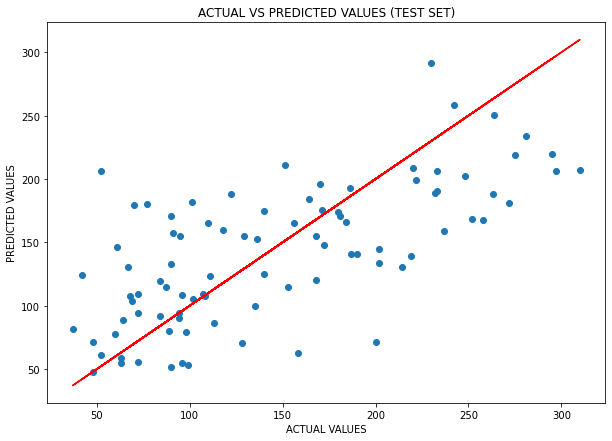

In [16]:
#image dimensions
plt.figure(figsize=(10, 7))

#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')

#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')

#showig plot
plt.show()

As can be seen from the graph above, there is no clear tendency for spots to be distributed around a line, confirming the fact that linear regression is not a good model. I must, therefore, look for another one.

But first, I also want to see a graph of the Kernel Density Estimation, which helps me visualize the probability density of a random variable, between real values ​​and those predicted by the linear model.

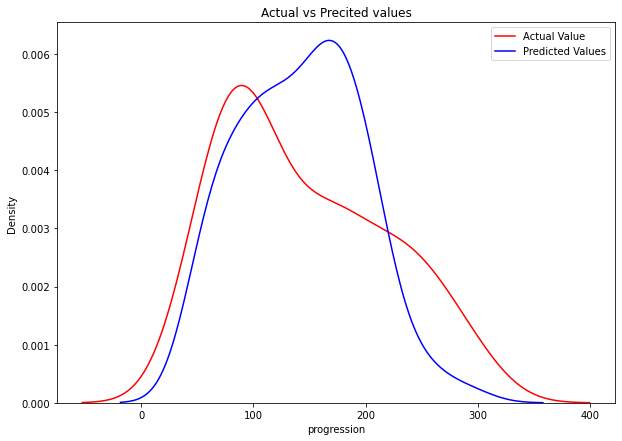

In [17]:
#image dimensions
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

As can be seen from this graph, the probability density of the predicted values does not approximate that of the real values.too well

Then, I try different models.

# THE LINEAR REGRESSION REGULARIZED MODEL: LASSO REGRESSION

I want to try a regularized model of the Linear Regression, and I choose Lasso Regression, as Ridge is to be used when there is high correlation between variables, but the correlation matrix has shown us that this is not the case.

In [18]:
#defining the lasso model
model = Lasso()

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# efine grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

#define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#performing the search on the train dataset
results = search.fit(X_train, y_train)

#printing
print(f'MAE:{results.best_score_: .2f}')
print(f'Best Alpha:{results.best_params_}')

MAE:-44.86
Best Alpha:{'alpha': 0.01}


The best alpha value is 0.01, and it gives me a fairly high Mean Absolute Error (the fact that the MAE is negative doesn't matter: sklearn makes it negative for its optimization reasons; in any case, to be a good value it should be "more next possible "to 0). It should also be added that alpha = 0.01 is a "very small" value; alpha = 0 is the case for normal (non-regularized) regression, which, in addition to the high MAE, tells me that this model is not too good for solving this type of ML problem.

Apart from the sign of the number, the MAE is practically the same as the simple regression method. In the above example, the grid was uniform; now,  I want to try to extend it using the 'loguniform' method:

In [19]:
# define model
model = Lasso()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

#define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, y)

#printing
print(f'MAE:{results.best_score_: .2f}')
print(f'Best Alpha:{results.best_params_}')

MAE:-44.86
Best Alpha:{'alpha': 0.01}


I found the same best alpha value as before, so I'm going to do the fit with alpha = 0.01 to evaluate the performance of the regularized regression model of the Lasso type:

In [20]:
#lasso with best alpha
model_best = Lasso(alpha=0.01).fit(X_train, y_train)

#predictions
y_test_pred = model_best.predict(X_test)
y_train_pred = model_best.predict(X_train)

In [21]:
#R^2
print(f'Coeff. of determination on train set:{model_best.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{model_best.score(X_test, y_test): .2f}') #test set

Coeff. of determination on train set: 0.53
Coeff. of determination on test set: 0.46


These values are too similar to the ones obtained with the simple linear regression model, telling us that even the regularized method is not a good one. This has to be expected, since the best alpha is 0.01 and we have to remember that alpha=0 is the simle linear regression case.

Anyway, let's see a couple of visualitazions:

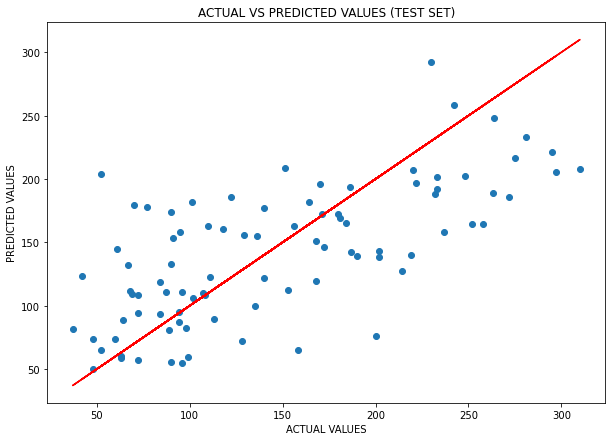

In [22]:
#figure size
plt.figure(figsize=(10, 7))

#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')

#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')

#showig plot
plt.show()

As can be seen from the graph above, there is no clear tendency for the spots to be distributed around a line.

Now, let's see the KDE:

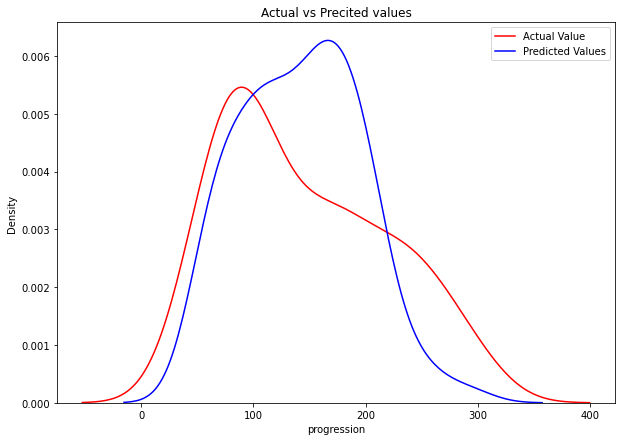

In [23]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

As can be seen from this graph, the probability density of the predicted values ​​does not at all approximate that of the real values.

Finally, I do a graphical analysis of the residuals:

Text(0, 0.5, 'REDISUALS')

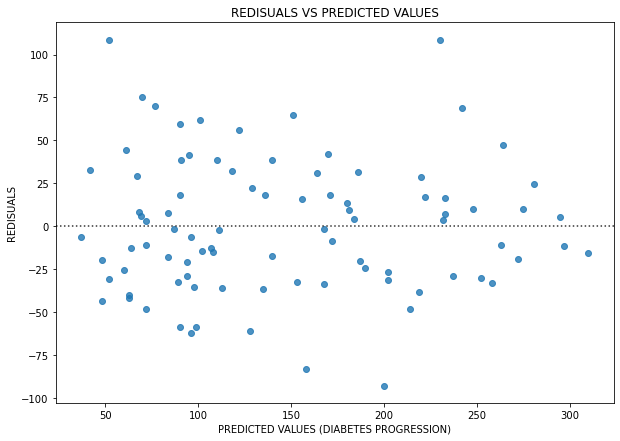

In [24]:
#figure size
plt.figure(figsize=(10, 7))

#residual plot
sns.residplot(x=y_test, y=y_test_pred)

#labeling
plt.title('REDISUALS VS PREDICTED VALUES')
plt.xlabel('PREDICTED VALUES (DIABETES PROGRESSION)')
plt.ylabel('REDISUALS')

The residuals are randomly distributed (there is no clear pattern in the plot above), which tells us that the model chosen is not entirely bad, but there are too many high values ​​of the residuals (even over 100) which means that the errors of the model are high. There is no particular tendency to underestimate or overestimate values; there is, however, a bit of a tendency to have high errors especially in the area with low disease progression values, while the errors decrease a little for high progression values, with the exception of some outliers.

Thus, this graph also confirms the fact that the linear regression model (albeit, regularized) is not a good model for this ML problem, and another one must be sought.

So, we have to try with a different model: let's try the polynomial regression method.

# THE POLYNOMIAL REGRESSION METHOD

Considering the values of MSE and RSME and of the graphs seen, I try the path of increasing the degree of the polynomial; that is, I try polynomial regression.

Considering the results obtained previously, I am going directly to use a polynomial of degree 3, as degree 2 immediately seems a little bit short to me. However, I do not want to exaggerate by inserting a degree that is too high as here it is a question of making a fit directly by transforming the available data, and then using the functions already seen for linear regression; in practice: if I use a polynomial degree that is too high I risk overfitting on the training set.

I create the 3rd degree and split polynomial function:

In [25]:
#creating the 3rd degree polinomial
poly = PolynomialFeatures(degree=3, include_bias=False)

#transforming the values in all X
poly_features = poly.fit_transform(X)

#splitting
X_train3, X_test3, y_train3, y_test3 = train_test_split(poly_features,y, test_size=0.2,random_state=42)

Creating the polynomial regression:

In [26]:
#creating the polynomial regression
poly_reg = LinearRegression()

#fitting
poly_reg.fit(X_train3, y_train3)

#predictions
y_test3_pred = poly_reg.predict(X_test3)
y_train3_pred = poly_reg.predict(X_train3)

Printing metrics:

In [27]:
#R^2
print(f'Coeff. of determination on train set:{poly_reg.score(X_train3, y_train3): .2f}') #train set
print(f'Coeff. of determination on test set:{poly_reg.score(X_test3, y_test3): .2f}') #test set

Coeff. of determination on train set: 0.88
Coeff. of determination on test set:-17.42


The coefficient of determination on train set, for this model, is much better than the linear regression model. But, the coefficient of determination on test set drops on value (with respect of the one on test set) which leds me think to an obvious situation appened here: overfitting (on test set)!
Let's see the other metrics:

In [28]:
#model metrics
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test3, y_test3_pred): .2f}')
print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test3, y_test3_pred)): .2f}')

The mean absolute error is: 169.65
The root mean squared error is: 312.43


In fact, The MAE and the MSE are much higher than the ones calculated with the previuos linear models.

I make a scatter chart of the actual values in comparison with the predicted:

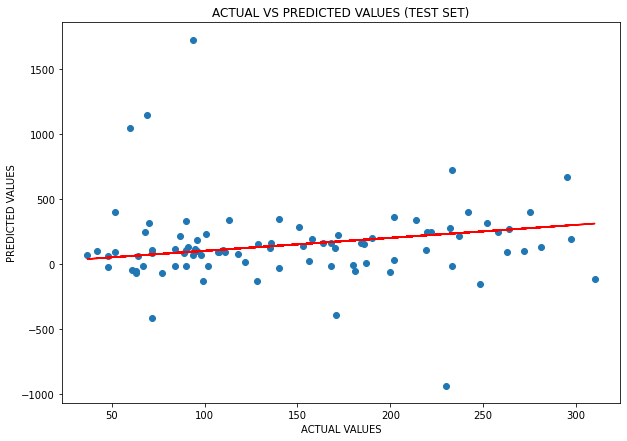

In [29]:
#figure size
plt.figure(figsize=(10, 7))

#scatterplot of y_test and y_test_pred
plt.scatter(y_test3, y_test3_pred)
plt.plot(y_test, y_test, color='r')

#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')

#showig plot
plt.show()

Remembering that we have transformed the starting domain with a third-degree polynomial function, as we can now see the data are quite clearly thickened around a line (which is a line in the transformed domain), but there are high outlier values that leads me think that this model is not as good as I tought for this particolare ML proble.

Finally, also here I want to make a visualization with KDE:

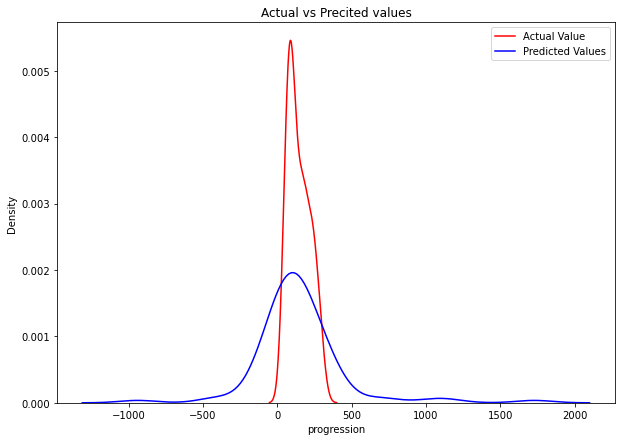

In [30]:
#figure size
plt.figure(figsize=(10, 7))

#diabetes outcome (Kernel Density Estimation)
ax = sns.kdeplot(y_test3, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test3_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

The KDE confirms that the polynomial regression is indeed not a good model to use here. Also, due to overfitting this is the worst model seen for now.

# SUPPORT VECTOR REGRESSION (SVR)

Now, I want to try with the support vector regression model:

In [31]:
#defining the lasso model
model_svr = SVR()

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define parameters
param = {'kernel': ('linear', 'rbf', 'poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

#define search
search = GridSearchCV(model_svr, param, cv=cv, n_jobs=-1)

#performing the search on the train dataset
results = search.fit(X_train, y_train)

#printing
print(f'Best Coeff. of determination:{results.best_score_: .2f}')
print(f'Best parameters:{results.best_params_}')

Best Coeff. of determination: 0.11
Best parameters:{'C': 10, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}


R^2 is the worst found, and it is telling us that SVR is not a good model,  but for the sake of exercizing let's evaluating the best SVR:

In [32]:
#best SVR
model_best = SVR(C=10, epsilon=0.5, gamma=1e-07, kernel='linear').fit(X_train, y_train)

#predictions
y_test_pred = model_best.predict(X_test)
y_train_pred = model_best.predict(X_train)

#R^2
print(f'Coeff. of determination on train set:{model_best.score(X_train, y_train): .2f}') #train set
print(f'Coeff. of determination on test set:{model_best.score(X_test, y_test): .2f}') #test set

Coeff. of determination on train set: 0.14
Coeff. of determination on test set: 0.17


In [33]:
#model metrics
print(f'The mean absolute error is:{metrics.mean_absolute_error(y_test, y_test_pred): .2f}')
print(f'The root mean squared error is:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)): .2f}')

The mean absolute error is: 56.53
The root mean squared error is: 66.41


The metrics can be numerically compared to the ones found with the linear models, confirming that SVR is not a good model for this problem; anyway, let's see a couple of graphs:

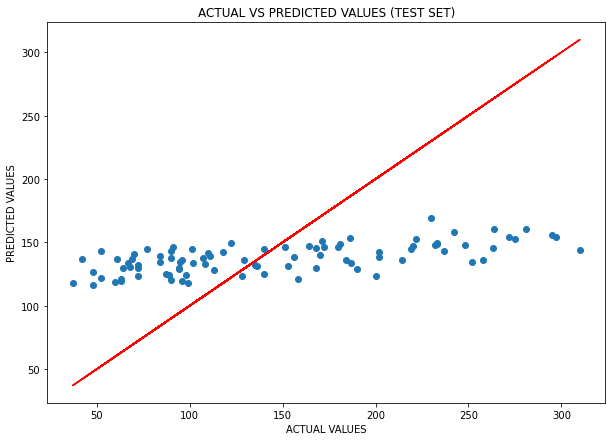

In [34]:
#figure size
plt.figure(figsize=(10, 7))

#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_test_pred)
plt.plot(y_test, y_test, color='r')

#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')

#showig plot
plt.show()

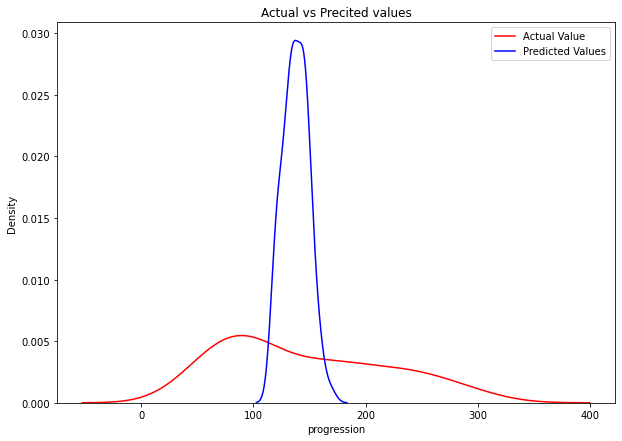

In [36]:
#figure size
plt.figure(figsize=(10, 7))

#diabetes outcome (Kernel Density Estimation)
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

So,definetely, SVR is not a good model for this ML problem.